# Data 1

## Overall

In [1]:
import json

filename = 'data/data1/diction.json'
with open(filename, 'r') as file:
    data = json.load(file)

### Number of Acronyms

In [2]:
len(data)

732

### Number of word senses per acronyms

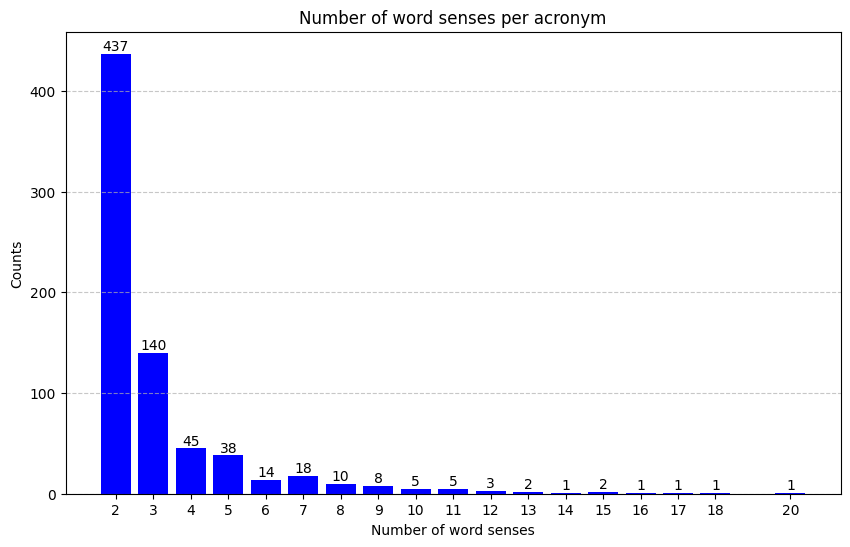

In [46]:
value_number_list = [len(value) for key, value in data.items()]
from collections import Counter
value_number_dict = Counter(value_number_list)

# Plot the number
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
bars = plt.bar(value_number_dict.keys(), value_number_dict.values(), color='blue')
plt.xlabel('Number of word senses')
plt.ylabel('Counts')
plt.title('Number of word senses per acronym')
plt.xticks(list(value_number_dict.keys()))  # Ensure all labels are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

Below acronym has 20 word senses. Let's print out what word senses are.

In [10]:
def get_key_value(data, number):
    for key, value in data.items():
        if len(value) == number:
            print (key, value)
            
get_key_value(data, 20)

CS ['computer systems', 'computer science', 'clonal selection', 'connection size', 'computational science', 'centralized solution', 'compressive sensing', 'core semantics', 'coordinated scheduling', 'charging station', 'constraint solver', 'conventional sparsity', 'compressed sensing', 'critical section', 'common subset', 'content store', 'case - sensitive', 'consensus score', 'code - switching', 'cluster - specific']


## Training data

In [11]:
# Train data
filename = 'data/data1/train.json'
with open(filename, 'r') as file:
    train_data = json.load(file)

print (len(train_data))

50034


In [17]:
train_data[0]

{'acronym': 20,
 'expansion': 'secrecy rate',
 'id': 'TR-0',
 'tokens': ['In',
  'summary',
  ',',
  'it',
  'is',
  'evident',
  'that',
  'their',
  'complexities',
  'are',
  'in',
  'increasing',
  'order',
  ':',
  'leakage',
  '-',
  'based',
  ',',
  'Max',
  '-',
  'SR',
  ',',
  'and',
  'generalized',
  'EDAS',
  '.']}

### Number of Acronyms

In [25]:
from collections import Counter
train_word_sense_dict = {}
sense_counter = Counter()
for item in train_data:
    acr = item['tokens'][item['acronym']]
    word_sense = item['expansion']
    if train_word_sense_dict.get(acr):
        train_word_sense_dict[acr][word_sense] += 1
    else:
        train_word_sense_dict[acr] = Counter()
        train_word_sense_dict[acr][word_sense] = 1

print (len(train_word_sense_dict))

731


### Number of sentences per word sense

In [24]:
train_word_sense_dict

{'SR': Counter({'secrecy rate': 110,
          'spatial resolution': 33,
          'stacked refinement': 22,
          'small resolution': 20,
          'super resolution': 14,
          'systematic review': 8,
          'strategic rationale': 6,
          'success rate': 5,
          'segment representation': 2}),
 'MGM': Counter({'markov geographic model': 79,
          'manifold geometry matching': 50}),
 'GCN': Counter({'graph convolution networks': 394,
          'global convolution networks': 13,
          'generalised convolutional neural network': 11}),
 'AC': Counter({'auto - correlation': 24,
          'actor - critic': 13,
          'audio commons': 9,
          'activation clustering': 5,
          'avoid congestion': 4,
          'access categories': 4,
          'alternating current': 3,
          'access category': 3,
          'autonomic computing': 2,
          'atrous convolution': 2,
          'admission control': 2,
          'attack criteria': 1}),
 'CNN': Counter(

In [33]:
word_sense_number_list = []
for acy, counter in train_word_sense_dict.items():
    word_sense_number_list.extend(counter.values())

word_sense_number_dict = Counter(word_sense_number_list)
word_sense_number_dict = {k: word_sense_number_dict[k] for k in sorted(word_sense_number_dict)}
word_sense_number_dict

{1: 338,
 2: 287,
 3: 178,
 4: 134,
 5: 124,
 6: 80,
 7: 69,
 8: 68,
 9: 45,
 10: 55,
 11: 41,
 12: 41,
 13: 39,
 14: 23,
 15: 20,
 16: 19,
 17: 21,
 18: 16,
 19: 17,
 20: 13,
 21: 13,
 22: 17,
 23: 11,
 24: 17,
 25: 18,
 26: 14,
 27: 12,
 28: 14,
 29: 15,
 30: 11,
 31: 16,
 32: 10,
 33: 20,
 34: 17,
 35: 10,
 36: 6,
 37: 5,
 38: 10,
 39: 6,
 40: 5,
 41: 10,
 42: 8,
 43: 8,
 44: 8,
 45: 4,
 46: 1,
 47: 5,
 48: 5,
 49: 3,
 50: 6,
 51: 4,
 52: 5,
 53: 5,
 54: 3,
 55: 3,
 56: 2,
 57: 2,
 58: 3,
 59: 4,
 60: 3,
 61: 4,
 62: 7,
 63: 4,
 64: 2,
 65: 2,
 66: 1,
 67: 6,
 68: 2,
 69: 2,
 70: 1,
 72: 3,
 73: 3,
 74: 3,
 75: 2,
 76: 4,
 77: 3,
 78: 3,
 79: 6,
 81: 6,
 82: 4,
 83: 3,
 84: 2,
 85: 1,
 86: 4,
 87: 2,
 88: 1,
 89: 2,
 90: 2,
 91: 2,
 93: 3,
 95: 1,
 96: 2,
 97: 2,
 98: 2,
 101: 3,
 102: 2,
 104: 1,
 105: 2,
 106: 3,
 108: 1,
 110: 2,
 111: 1,
 114: 1,
 115: 3,
 117: 1,
 118: 3,
 119: 1,
 121: 1,
 122: 2,
 123: 2,
 125: 1,
 128: 1,
 137: 1,
 138: 2,
 142: 1,
 143: 1,
 146: 1,
 147: 1,

In [35]:
def get_key_value(data, number):
    for acr, counter in data.items():
        for word_sense, value in counter.items():
            if value == number:
                print (acr, word_sense, value)
            
get_key_value(train_word_sense_dict, 1064)

for item in train_data:
    if item['tokens'][item['acronym']] == 'DCP' and item['expansion'] == 'deep context prediction':
        print (item['tokens'])

RNN recurrent neural network 1064


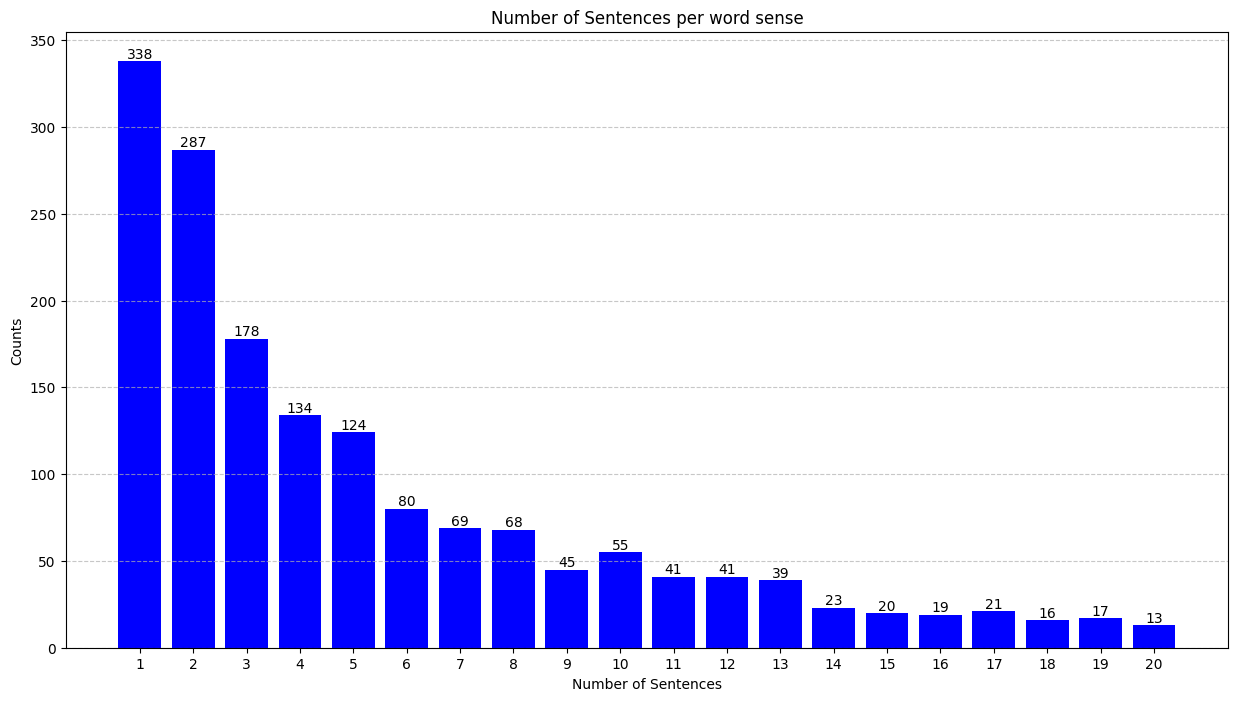

In [47]:
# Plot the number
from matplotlib import pyplot as plt
plt.figure(figsize=(15, 8))
bars = plt.bar(list(word_sense_number_dict.keys())[:20], list(word_sense_number_dict.values())[:20], color='blue')
plt.xlabel('Number of Sentences')
plt.ylabel('Counts')
plt.title('Number of Sentences per word sense')
plt.xticks(list(word_sense_number_dict.keys())[:20])  # Ensure all labels are shown
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

# Data 2